In [ ]:
%matplotlib inline

In [ ]:
import math
import time
import random
import secrets
import numpy as np
import matplotlib.pyplot as plt
import signal
from numpy.polynomial.polynomial import Polynomial
from sympy import factorint, isprime
from functools import wraps

# Basic Algebra Exercise - Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra

>[Basic Algebra Exercise - Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra](#scrollTo=qIQwyjrvOBGY)

>>[Problem 1. Polynomial Interpolation](#scrollTo=vo40z3G9vZzX)

>>>[Solution](#scrollTo=YzyVT_o5OBGc)

>>>>[Test interpolation and extrapolation](#scrollTo=JNMfW7QMNV6n)

>>>>[Test interpolation with smaller degree](#scrollTo=-6v9W-4oMFKa)

>>>>[Test interpolation with higher degree](#scrollTo=UjXX9U2POBGc)

>>>>[Test extrapolation with higher degree and larger x_min/x_max](#scrollTo=3iAiXLV79581)

>>[Problem 2. Complex Numbers as Vectors](#scrollTo=6LzT4w3wv5I6)

>>>[Solution](#scrollTo=AzOfIofFZXtI)

>>>>[Test plotting single complex number and a list of complex numbers](#scrollTo=yR90QM_8aeud)

>>>>[Test adding complex numbers](#scrollTo=y82jA503sG6n)

>>>>[Test multiplying complex numbers](#scrollTo=JX4HcccWtaoa)

>>[Problem 3. Recursion and Fractals](#scrollTo=xwyPdVcSGnpL)

>>>[Recursive n factorial](#scrollTo=qutfYBNdI7Ho)

>>>>[Test recursive n factorial](#scrollTo=CHNz-I60Ju8e)

>>>[Iterative n factorial](#scrollTo=APzbQPC-JFRB)

>>>>[Test iterative n factorial](#scrollTo=oOPzwYNvMfz3)

>>>[Endless sequences](#scrollTo=pToUfMTWOBGf)

>>>>[Test nat](#scrollTo=xD2N77pEPKwl)

>>>>[Test even](#scrollTo=enWA6z3tQxm7)

>>>>[Test factorial_generator](#scrollTo=MGwB8ZnBTd9f)

>>>>[Test fibonacci_generator](#scrollTo=OPzyJs7NYeJq)

>>>[The Mandelbrot set](#scrollTo=C3niKgZdOBGj)

>>[Problem 4. Run-length Encoding](#scrollTo=np0O0EGCOBGj)

>>>[Solution - encoding and decoding functions](#scrollTo=gLSKg92BfKDh)

>>>>[Test encoding and decoding](#scrollTo=Zr6w8L6wfchO)

>>>[Measure compression ratio](#scrollTo=y85ZByfyhAtj)

>>[Problem 5. Function Invertibility and Cryptography](#scrollTo=n2Qnt8mC66Fj)

>>>[Solution](#scrollTo=0NZa2ymh8vZA)

>>>>[Test](#scrollTo=R94ANn9x_E6s)

>>[Problem 6. Diffie - Hellman Key Exchange Simulation](#scrollTo=Dqi3H-7-OBGk)

>>>[Solution](#scrollTo=QbT-UpAemArq)

>>>>[Test and measure time for key exchange](#scrollTo=csDr_0fN2sOT)

>>>>[Test and measure time for eavesdropper to find the shared secred](#scrollTo=HPfNqeeY2wUa)

>>[🔴** Problem 7. The Galois Field in Cryptography](#scrollTo=YR2BiXUSOBGk)

>>[🔴** Problem 8. Huffman Compression Algorithm](#scrollTo=Xz2smULwOBGl)



## Problem 1. Polynomial Interpolation

Given a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, figure out what function may have generated these points and plot it.

### Solution
Assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

In [ ]:
def interpolate_polynomial(points, degree):
    """
    Interpolates a polynomial of the specified degree through the given points
    Input:
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    """
    x = points[:, 0]
    y = points[:, 1]

    return Polynomial.fit(x, y, degree)

Create a generic plotting function that will plot 1 to 4 polynomials in a grid. The goal is to have several plots side by side for easy comparison.

In [ ]:
def plot_polynomials(polynomials):
    """
    Plots 1 to 4 polynomials
    Input:
    polynomials - a list of 1 to 4 tuples. Each tuple contains:
        poly - polinomial (the result of function interpolate_polynomial)
        points - a list of points (x, y) to plot (scatter)
        min_x, max_x - range of x values used to plot the interpolating polynomial
    Note: input validity ommited for brevity, the goal of the function is to experiement with polynomials and degree
    """
    colors = ["blue", "orange", "green", "red"]
    num_polynomials = len(polynomials)
    plot_rows = (lambda x: 1 if x in [1, 2, 3] else 2)(num_polynomials)
    plot_cols = (lambda x: x if x in [1, 2, 3] else 2)(num_polynomials)

    fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(5*plot_cols, 4*plot_rows))
    fig.tight_layout(pad=4)

    for i, (poly, points, min_x, max_x, title) in enumerate(polynomials):
        ax = axes if not isinstance(axes, np.ndarray) else axes[i] if len(axes.shape)==1 else axes[math.floor(i/2),i%2]

        plot_x = np.linspace(min_x, max_x, 1000)
        plot_y = poly(plot_x)

        ax.plot(plot_x, plot_y, f'tab:{colors[i]}')
        ax.scatter(points[:, 0], points[:, 1])

        ax.set_title(title)
        ax.set(xlabel='x', ylabel='y')

#### Test interpolation and extrapolation

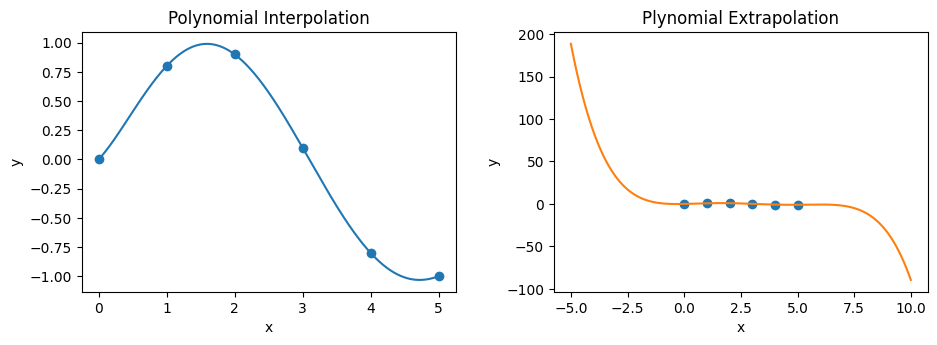

In [ ]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
poly = interpolate_polynomial(points, len(points) - 1)

plot_polynomials([
    (poly, points, np.min(points[:, 0]), np.max(points[:, 0]), "Polynomial Interpolation"),
    (poly, points, -5, 10, "Plynomial Extrapolation")]
)

#### Test interpolation with smaller degree

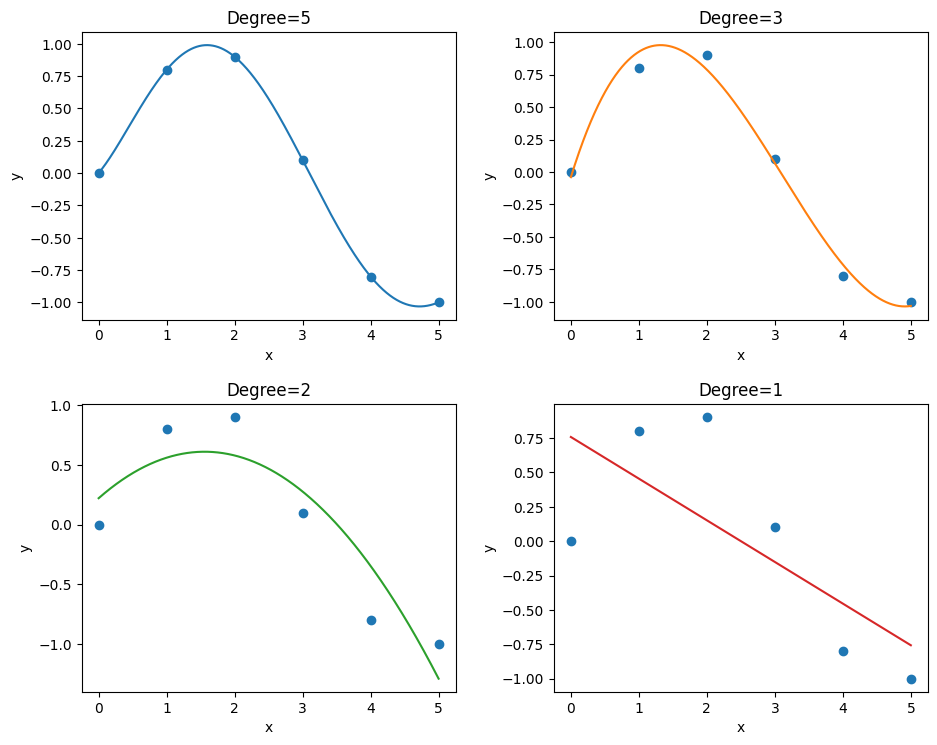

In [ ]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 3)
poly2 = interpolate_polynomial(points, 2)
poly3 = interpolate_polynomial(points, 1)

min_max_x = (np.min(points[:, 0]), np.max(points[:, 0]))
plot_polynomials([
    (poly0, points, *min_max_x, "Degree=5"),
    (poly1, points, *min_max_x, "Degree=3"),
    (poly2, points, *min_max_x, "Degree=2"),
    (poly3, points, *min_max_x, "Degree=1")]
)

#### Test interpolation with higher degree

/usr/local/lib/python3.10/dist-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


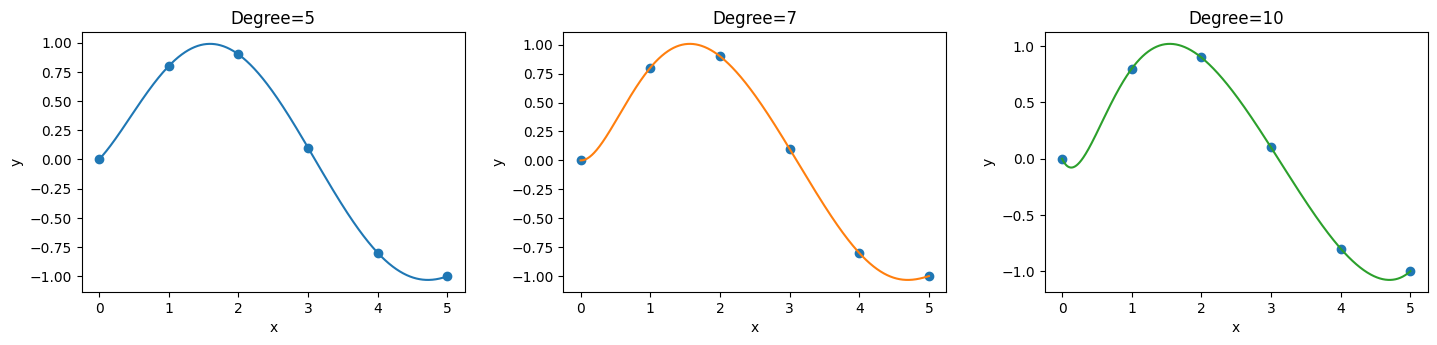

In [ ]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 7)
poly2 = interpolate_polynomial(points, 10)

min_max_x = (np.min(points[:, 0]), np.max(points[:, 0]))
plot_polynomials([
    (poly0, points, *min_max_x, "Degree=5"),
    (poly1, points, *min_max_x, "Degree=7"),
    (poly2, points, *min_max_x, "Degree=10")]
)

#### Test extrapolation with higher degree and larger x_min/x_max

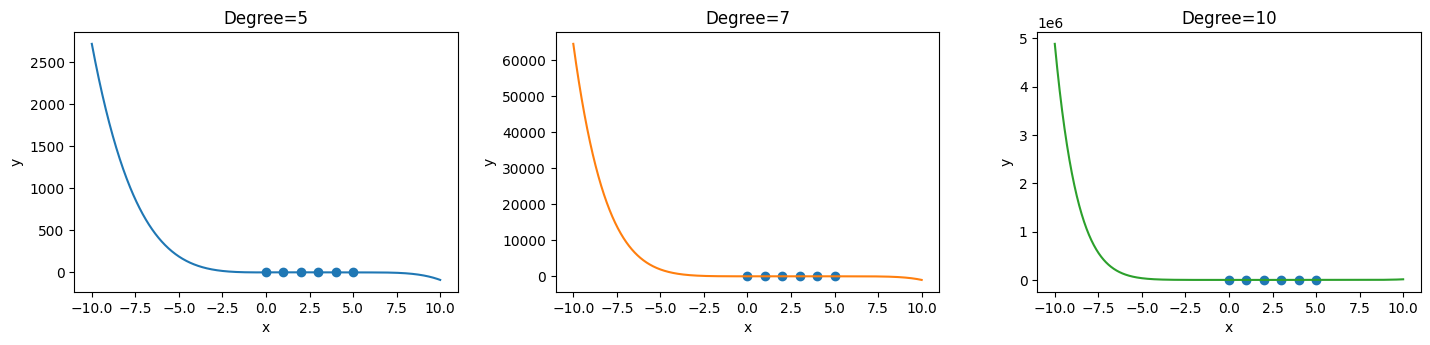

In [ ]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 7)
poly2 = interpolate_polynomial(points, 10)

plot_polynomials([
    (poly0, points, -10, 10, "Degree=5"),
    (poly1, points, -10, 10, "Degree=7"),
    (poly2, points, -10, 10, "Degree=10")]
)

## Problem 2. Complex Numbers as Vectors

Plot complex numbers as radius vectors.

### Solution

Functions to plot a single complex number and a list of complex numbers:

In [ ]:
def plot_complex_number(subplot, z):
    """Plots a single complex number z as a radius vector in the passed 2D subplot"""

    subplot.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
    subplot.set_xticks(range(-4, 5))
    subplot.set_yticks(range(-4, 5))

def plot_complex_numbers(subplot, numbers, colors):
    """Plots the given list of complex numbers as radius vectors in the passed 2D subplot"""

    x1 = [0] * len(numbers)
    y1 = [0] * len(numbers)
    x2 = [z.real for z in numbers]
    y2 = [z.imag for z in numbers]
    subplot.quiver(x1, y1, x2, y2, angles = "xy", scale_units = "xy", scale = 1, color = colors)

    subplot.set_xticks(range(-4, 5))
    subplot.set_yticks(range(-4, 5))

#### Test plotting single complex number and a list of complex numbers

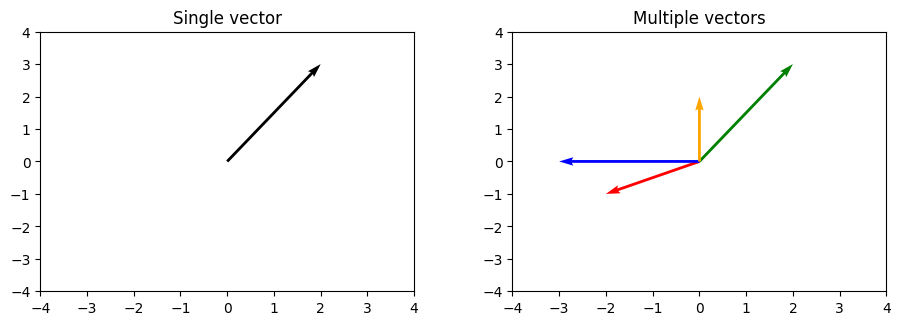

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5*2, 4*1))
fig.tight_layout(pad=4)

ax1.set_title("Single vector")
plot_complex_number(ax1, 2 + 3j)

ax2.set_title("Multiple vectors")
plot_complex_numbers(ax2, [2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

#### Test adding complex numbers

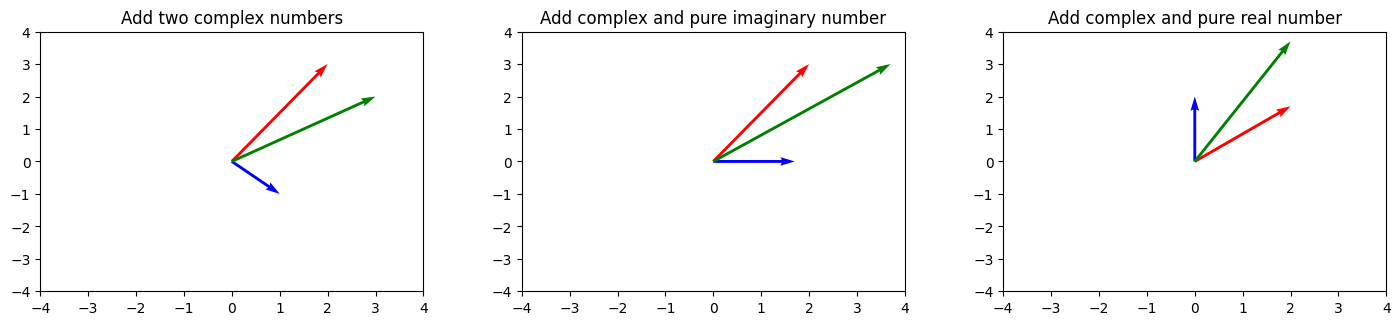

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5*3, 4*1))
fig.tight_layout(pad=4)

z1 = 2 + 3j
z2 = 1 - 1j
ax1.set_title("Add two complex numbers")
plot_complex_numbers(ax1, [z1, z2, z1 + z2], ["red", "blue", "green"])

z1 = 2 + 3j
z2 = 1.7 + 0j
ax2.set_title("Add complex and pure imaginary number")
plot_complex_numbers(ax2, [z1, z2, z1 + z2], ["red", "blue", "green"])

z1 = 2 + 1.7j
z2 = 0 + 2j
ax3.set_title("Add complex and pure real number")
plot_complex_numbers(ax3, [z1, z2, z1 + z2], ["red", "blue", "green"])

#### Test multiplying complex numbers

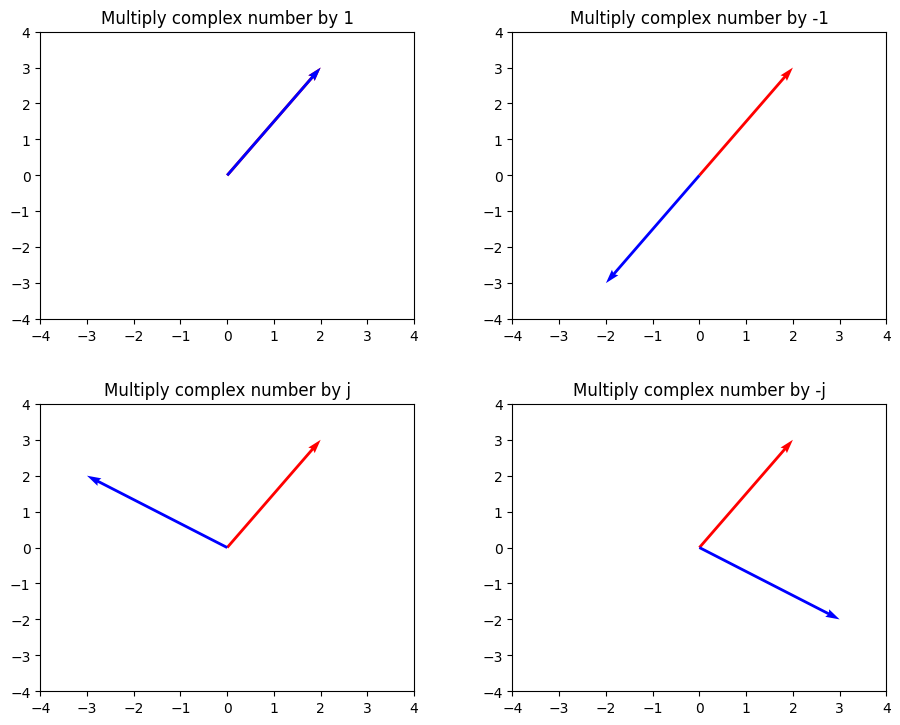

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5*2, 4*2))
fig.tight_layout(pad=4)

z = 2 + 3j
ax1.set_title("Multiply complex number by 1")
plot_complex_numbers(ax1, [z, z * 1], ["red", "blue"])

ax2.set_title("Multiply complex number by -1")
plot_complex_numbers(ax2, [z, z * -1], ["red", "blue"])

ax3.set_title("Multiply complex number by j")
plot_complex_numbers(ax3, [z, z * 1j], ["red", "blue"])

ax4.set_title("Multiply complex number by -j")
plot_complex_numbers(ax4, [z, z * -1j], ["red", "blue"])

## Problem 3. Recursion and Fractals

### Recursive n factorial

In [ ]:
def factorial_recursive(n):
    """Computes the factorial of a non-negative number n (using recursion)"""

    if not isinstance(n, int) or n < 0:
        raise ValueError("Input must be a non-negative number")

    if n == 0:
        return 1

    return n * factorial_recursive(n - 1)

#### Test recursive n factorial

In [ ]:
assert factorial_recursive(0) == 1
assert factorial_recursive(1) == 1
assert factorial_recursive(5) == 120
assert factorial_recursive(10) == 3628800
assert factorial_recursive(100) == 93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
assert factorial_recursive(500) == 1220136825991110068701238785423046926253574342803192842192413588385845373153881997605496447502203281863013616477148203584163378722078177200480785205159329285477907571939330603772960859086270429174547882424912726344305670173270769461062802310452644218878789465754777149863494367781037644274033827365397471386477878495438489595537537990423241061271326984327745715546309977202781014561081188373709531016356324432987029563896628911658974769572087926928871281780070265174507768410719624390394322536422605234945850129918571501248706961568141625359056693423813008856249246891564126775654481886506593847951775360894005745238940335798476363944905313062323749066445048824665075946735862074637925184200459369692981022263971952597190945217823331756934581508552332820762820023402626907898342451712006207714640979456116127629145951237229913340169552363850942885592018727433795173014586357570828355780158735432768888680120399882384702151467605445407663535984174430480128938313896881639487469658817504506926365338175055478128640000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### Iterative n factorial

In [ ]:
def factorial_iterative(n):
    """Computes the factorial of a non-negative number n (using iteration)"""

    if not isinstance(n, int) or n < 0:
        raise ValueError("Input must be a non-negative number")

    result = 1

    for i in range(1, n + 1):
        result *= i

    return result

#### Test iterative n factorial

In [ ]:
assert factorial_iterative(0) == 1
assert factorial_iterative(1) == 1
assert factorial_iterative(5) == 120
assert factorial_iterative(10) == 3628800
assert factorial_iterative(100) == 93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
assert factorial_iterative(500) == 1220136825991110068701238785423046926253574342803192842192413588385845373153881997605496447502203281863013616477148203584163378722078177200480785205159329285477907571939330603772960859086270429174547882424912726344305670173270769461062802310452644218878789465754777149863494367781037644274033827365397471386477878495438489595537537990423241061271326984327745715546309977202781014561081188373709531016356324432987029563896628911658974769572087926928871281780070265174507768410719624390394322536422605234945850129918571501248706961568141625359056693423813008856249246891564126775654481886506593847951775360894005745238940335798476363944905313062323749066445048824665075946735862074637925184200459369692981022263971952597190945217823331756934581508552332820762820023402626907898342451712006207714640979456116127629145951237229913340169552363850942885592018727433795173014586357570828355780158735432768888680120399882384702151467605445407663535984174430480128938313896881639487469658817504506926365338175055478128640000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

assert factorial_recursive(37) == factorial_iterative(37)
assert factorial_recursive(314) == factorial_iterative(314)

### Endless sequences

1: Write a funciton `nat` that priduces an endless list of natual numbers.

2: Use this to define a smaller, but just as infinite, sequence of even numbers.

3: Use the approach above to rewrite the factorial function in a "lazy" way.

4: Use the same approach to return the Fibonacci sequence

In [ ]:
def nat():
    """Returns all natural numbers"""
    n = 0
    while True:
        yield n
        n += 1

In [ ]:
def even():
    """Returns all even numbers"""
    natural_numbers = nat()
    while True:
        yield 2 * next(natural_numbers)

In [ ]:
def factorial_generator(n):
    """
    A generator that computes the factorial of a given number n and yields the next factorial until it reaches the end.
    Input:
        n (int): The number for which the factorial sequence will be generated.
    Yields:
        The next factorial in the sequence.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative number")

    if n == 0:
        yield 1

    factorial = 1
    for i in range(1, n+1):
        factorial *= i
        yield factorial

In [ ]:
def fibonacci_generator(n):
    """
    A generator that computes the Fibonacci sequence and yields each number in
    the sequence until it reaches the specified number of terms n.

    Parameters: n: The number of terms in the Fibonacci sequence to be generated.
    Must be a non-negative integer.

    Yields: The next number in the Fibonacci sequence.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative number")

    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

#### Test `nat`

In [ ]:
natural_numbers = nat()

assert(next(natural_numbers) == 0)
assert(next(natural_numbers) == 1)
assert(next(natural_numbers) == 2)

for _ in range(0, 100):
    next(natural_numbers)

assert(next(natural_numbers) == 103)

#### Test `even`

In [ ]:
even_natural_numbers = even()

assert(next(even_natural_numbers) == 0)
assert(next(even_natural_numbers) == 2)
assert(next(even_natural_numbers) == 4)

for _ in range(0, 100):
    next(even_natural_numbers)

assert(next(even_natural_numbers) == 206)

#### Test `factorial_generator`

In [ ]:
assert list(factorial_generator(0)) == [1]
assert list(factorial_generator(1)) == [1]
assert list(factorial_generator(2)) == [1, 2]
assert list(factorial_generator(3)) == [1, 2, 6]
assert list(factorial_generator(4)) == [1, 2, 6, 24]
assert list(factorial_generator(5)) == [1, 2, 6, 24, 120]

#### Test `fibonacci_generator`

In [ ]:
assert list(fibonacci_generator(0)) == []
assert list(fibonacci_generator(1)) == [0]
assert list(fibonacci_generator(2)) == [0, 1]
assert list(fibonacci_generator(3)) == [0, 1, 1]
assert list(fibonacci_generator(4)) == [0, 1, 1, 2]
assert list(fibonacci_generator(5)) == [0, 1, 1, 2, 3]

### The Mandelbrot set

Inspired by [this](https://colab.research.google.com/github/theofil/CompPhysics/blob/master/examples/mandelbrot.ipynb#scrollTo=lNtiF_n1Fjoa) notebook, which is adapted from the [numpy  docs](https://numpy.org/doc/stable/user/quickstart.html)

'mandelbrot' ((400, 400, 500), {}) 2.90 sec


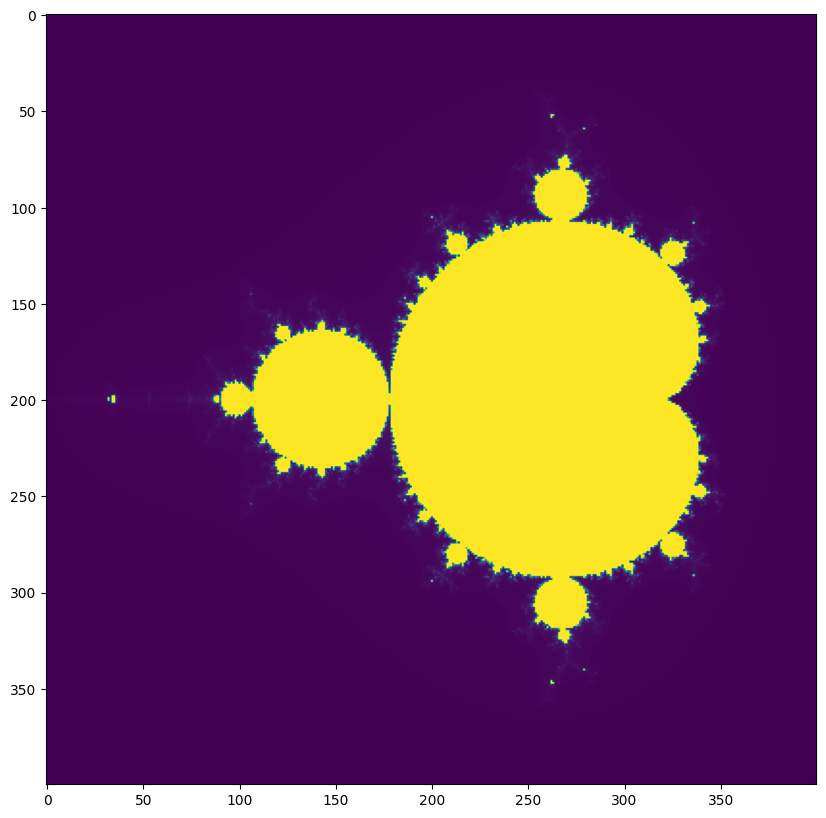

In [ ]:
def timeit(method):
    """Decorator function to measure the execution time of a function."""

    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print ('%r (%r, %r) %2.2f sec' % (method.__name__, args, kw, te-ts))
        return result

    return timed

@timeit
def mandelbrot(height, width, maxit=20):
    """Returns an image of the Mandelbrot fractal of size height x width."""

    y, x = np.ogrid[ -1.4:1.4:height*1j, -2:0.8:width*1j ]
    c = x+y * 1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime

ax, fig = plt.subplots(figsize=(10,10))
plt.imshow(mandelbrot(400, 400, 500))
plt.show()

## Problem 4. Run-length Encoding

1: Write a function that encodes a given text using [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding). Write another one that decodes.


2: Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet).

3: Measure how much your data is compressed relative to the original.

### Solution - encoding and decoding functions

In [ ]:
def encode(input):
    """
    Returns the run-length encoded version of the text
    (numbers after symbols, length = 1 is skipped)
    """
    next_substring_offset = lambda s: next((i for i in range(len(s)) if s[0] != s[i]), len(s))

    offset = 0
    result = ""

    while offset < len(input):
        next_offset = next_substring_offset(input[offset:])
        chunk = input[offset:offset+next_offset]
        chunk_len = len(chunk)
        offset += chunk_len

        first = chunk[0]
        result += f"{chunk[0]}{chunk_len if chunk_len > 1 else ''}"
    return result

def decode(input):
    """Decodes the text using run-length encoding"""
    offset = 0
    result = ""
    next_substring = lambda input, offset, length: input[offset: offset + min(length, len(input)-offset)]

    while offset < len(input):
        chunk = next_substring(input, offset, 2) # get next 2 chars, 1 if this is the last char
        first, second = (chunk + ' ')[:2]        # unpack safely, 'second' can be ' '
        if second.isalpha() or second == ' ':
            result += first
            offset += 1
        else:
            result += first * int(second)
            offset += 2
    return result

#### Test encoding and decoding

In [ ]:
data = [("", ""),
        ("A", "A"),
        ("AA", "A2"),
        ("AAA", "A3"),
        ("AB", "AB"),
        ("ABBB", "AB3"),
        ("AAAAAABAAAAAA", "A6BA6"),
        ("ABCDEFABCDEF", "ABCDEFABCDEF"),
        ("ABBCCCDDDDEEEEEFFFFFF", "AB2C3D4E5F6"),
        ("atcgaacggtatcttcatttctggtcctccctgaggcgggcccgtgtaaccaatcgatacccgtatgaactgtgatgttgtatttaacatcgaacggatagagatcttcatgccccctctccgaacgttagtgcatggagcctgaggcagctcctggcgtcagatgtggctatacgttgtcgtacaacgattataggagccagttcgcccctgggagggtgacaacaatctcaaatatgacctccatcaaaacgcgttgaggacattaccgaacacatagcctccgcgcacttgttgattaactggcagcggcccttcgctgacaaaaagcgtattcgaacgtgctacctgcctccggcatgtactcattggttggctacttagctgcaccaagatccccagtgcaccaacggatcagggttctgtctgctgccaggtatgtcgaccacaggcatccccgagctgcctgtctaggtgacagacgcgaagagtctctcgcaatacacttacccgcgaagtcctttgagtattcactcttccgattagtagaagcacgtcttgcggaattgtttcctaagtgctttcactggggtagtcgtacatacacccgacgtacaacgttccgtagtgcattgatctaaaatgtcaagtgagtgctaaacttgactcccgaggagaatgttgattttgtcgtgcttgtggttagtgtgcgtatttaacttaaagatgaccgtagaaacatggcagcggagaaagtcgcctcgctggtgaatatttgtagcggagcggccgcgacgagtggcgtctctcagcacacgccaacggggactgtgtctaaccggggcgtatggggtaagtgcacttaattgtggcgatgtagctatgcaaattatatccccaatgatgtggtatccaccctgggttggcaggccgagggagccggctcacgccgaacggatctcacgaataagtgttaatataacaagggggtatgctttat", "atcga2cg2tatct2cat3ctg2tc2tc3tgag2cg3c3gtgta2c2a2tcgatac3gtatga2ctgtgatgt2gtat3a2catcga2cg2atagagatct2catgc5tctc2ga2cgt2agtgcatg2agc2tgag2cagctc2tg2cgtcagatgtg2ctatacgt2gtcgtaca2cgat2atag2agc2agt2cgc4tg3ag3tgaca2ca2tctca3tatgac2tc2atca4cgcgt2gag2acat2ac2ga2cacatagc2tc2gcgcact2gt2gat2a2ctg2cagcg2c3t2cgctgaca5gcgtat2cga2cgtgctac2tgc2tc2g2catgtactcat2g2t2g2ctact2agctgcac2a2gatc4agtgcac2a2cg2atcag3t2ctgtctgctgc2ag2tatgtcgac2acag2catc4gagctgc2tgtctag2tgacagacgcga2gagtctctcgca2tacact2ac3gcga2gtc2t3gagtat2cactct2c2gat2agtaga2gcacgtct2gcg2a2t2gt3c2ta2gtgct3cactg4tagtcgtacatacac3gacgtaca2cgt2c2gtagtgcat2gatcta4tgtca2gtgagtgcta3ct2gactc3gag2aga2tgt2gat4gtcgtgct2gtg2t2agtgtgcgtat3a2ct2a3gatgac2gtaga3catg2cagcg2aga3gtcgc2tcgctg2tga2tat3gtagcg2agcg2c2gcgacgagtg2cgtctctcagcacacgc2a2cg4actgtgtcta2c2g4cgtatg4ta2gtgcact2a2t2gtg2cgatgtagctatgca3t2atatc4a2tgatgtg2tatc2ac3tg3t2g2cag2c2gag3agc2g2ctcacgc2ga2cg2atctcacga2ta2gtgt2a2tata2ca2g5tatgct3at")]

for original, encoded in data:
    assert encode(original) == encoded
    assert decode(encoded) == original

### Measure compression ratio

In [ ]:
dna = "atcgaacggtatcttcatttctggtcctccctgaggcgggcccgtgtaaccaatcgatacccgtatgaactgtgatgttgtatttaacatcgaacggatagagatcttcatgccccctctccgaacgttagtgcatggagcctgaggcagctcctggcgtcagatgtggctatacgttgtcgtacaacgattataggagccagttcgcccctgggagggtgacaacaatctcaaatatgacctccatcaaaacgcgttgaggacattaccgaacacatagcctccgcgcacttgttgattaactggcagcggcccttcgctgacaaaaagcgtattcgaacgtgctacctgcctccggcatgtactcattggttggctacttagctgcaccaagatccccagtgcaccaacggatcagggttctgtctgctgccaggtatgtcgaccacaggcatccccgagctgcctgtctaggtgacagacgcgaagagtctctcgcaatacacttacccgcgaagtcctttgagtattcactcttccgattagtagaagcacgtcttgcggaattgtttcctaagtgctttcactggggtagtcgtacatacacccgacgtacaacgttccgtagtgcattgatctaaaatgtcaagtgagtgctaaacttgactcccgaggagaatgttgattttgtcgtgcttgtggttagtgtgcgtatttaacttaaagatgaccgtagaaacatggcagcggagaaagtcgcctcgctggtgaatatttgtagcggagcggccgcgacgagtggcgtctctcagcacacgccaacggggactgtgtctaaccggggcgtatggggtaagtgcacttaattgtggcgatgtagctatgcaaattatatccccaatgatgtggtatccaccctgggttggcaggccgagggagccggctcacgccgaacggatctcacgaataagtgttaatataacaagggggtatgctttat"
dna_encoded = encode(dna)

encoding_ratio = round(1 - len(dna_encoded) / len(dna), 2)

print(f"The encoding ratio is {encoding_ratio}%")

The encoding ratio is 0.06%


## * Problem 5. Function Invertibility and Cryptography

1: Specify a sequence of bit lengths, in increasing order. For example, you might choose something like [10, 20, 25, 30, 32, 33, 35, 38, 40]. Depending on your computer's abilities you can go as high as you want.

2: For each bit length, generate a number.

3: See how much time it takes to factor it.

4: Then see how much time it takes to multiply the factors.
In order to have better accuracy, do it multiple times, and average the results.

5: Plot all multiplication and factorization times as a function of the number of bits.

### Solution

In [ ]:
def measure_mean_execution_time(function_to_measure, arg, iterations):
    """Decorator to measure the mean execution time of a function."""

    start_time = time.time()
    [ function_to_measure(arg) for _ in range(iterations)]
    end_time = time.time()
    average_time = ((end_time - start_time) / iterations) * 1000

    return (round(average_time, 3))


def get_multiplied_factors(factors):
    return math.prod(base ** exponent for base, exponent in factors.items())


#### Test

Random numbers:    [897, 434100, 679364434, 665429003539, 1027167206600352, 239220060073303830]
Factors List:      [{3: 1, 13: 1, 23: 1}, {2: 2, 3: 1, 5: 2, 1447: 1}, {2: 1, 7: 1, 157: 1, 309083: 1}, {739: 1, 900445201: 1}, {2: 5, 3: 1, 17: 1, 29: 1, 67: 1, 323927777: 1}, {2: 1, 3: 1, 5: 1, 479: 1, 1879: 1, 8859598621: 1}]
Time to factor:    [0.062, 0.023, 0.248, 0.82, 0.62, 1.28]
Time to multiply:  [0.002, 0.003, 0.003, 0.002, 0.004, 0.016]


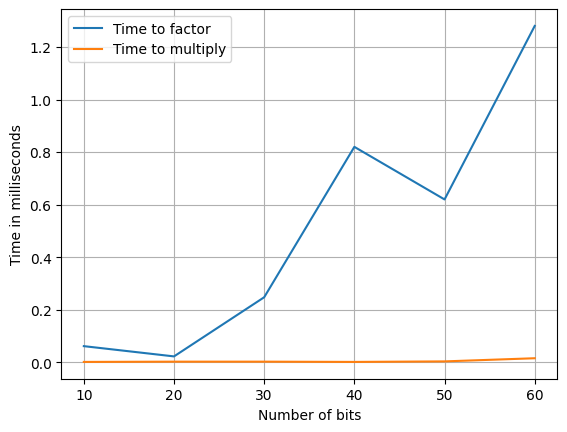

In [ ]:
bit_lengths = [10, 20, 30, 40, 50, 60]
random_numbers = [ secrets.randbits(n) for n in bit_lengths ]
factors_list = [ factorint(n) for n in random_numbers ]
time_to_factor = [ measure_mean_execution_time(factorint, arg, 1000) for arg in random_numbers ]
time_to_multiply = [ measure_mean_execution_time(get_multiplied_factors, arg, 1000) for arg in factors_list ]

print("Random numbers:   ", random_numbers)
print("Factors List:     ", factors_list)
print("Time to factor:   ", time_to_factor)
print("Time to multiply: ", time_to_multiply)

plt.plot(bit_lengths, time_to_factor)
plt.plot(bit_lengths, time_to_multiply)
plt.legend(["Time to factor", "Time to multiply"])
plt.xlabel("Number of bits")
plt.ylabel("Time in milliseconds")
plt.grid()
plt.show()

## * Problem 6. Diffie - Hellman Key Exchange Simulation

Simulate the **Diffie - Hellman key exchange** algorithm.
- Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds).
- Simulate both participants in the key exchange. Simulate an eavesdropper.
- First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).
- Second, see how long it takes for them to exchange keys.
- Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

### Solution

In [ ]:
# first some helper functions (decorators)
def execute_with_timeout(seconds):
    """Decorator that applies a timeout to the function"""

    def raise_timeout(signum, frame):
        raise Exception()

    def decorator(func):
        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, raise_timeout)
            signal.alarm(seconds)
            try:
                return func(*args, **kwargs)
            finally:
                signal.alarm(0)
        return wrapper
    return decorator

def timeit(func):
    """
    A decorator that measures the execution time of a function.

    Input: func (function): The function to be measured.
    Returns: function: A wrapper function that executes the given function and measures its execution time.
    """
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        return result, total_time
    return timeit_wrapper

In [ ]:
def generate_prime(n_bits):
    """Generate a prime number with a specified number of bits."""
    while True:
        num = random.getrandbits(n_bits)
        if isprime(num):
            return num

def find_primitive_root(p):
    """
    Find the smallest primitive root of a prime number p.

    A primitive root g is a number such that for every number a coprime to p,
    there exists an integer k where g^k = a (mod p).

    Input: p (int): A prime number.
    Returns: int or None: The smallest primitive root of p, or None if not found.
    """
    for g in range(2, p):
        if pow(g, 2, p) != 1 and pow(g, (p - 1) // 2, p) != 1:
            return g
    return None

class DHKeyExchangeParticipant:
    """A participant in the Diffie-Hellman key exchange protocol."""

    def __init__(self, name):
        self.name = name

    def choose_private_key(self):
        self.private_key = random.randint(1, p - 1)

    def calculate_public_key(self):
        self.public_key = pow(g, self.private_key, p)
        return self.public_key

    def calculate_shared_secret(self, other_public_key):
        self.shared_secret = pow(other_public_key, self.private_key, p)

@execute_with_timeout(30)
def eavesdropper_bruteforce(p, g, alice_public_key, bob_public_key):
    """
    Try to perform a brute force attack on the Diffie-Hellman protocol to find
    the shared secret key.

    Parameters:
    p (int): A prime number.
    g (int): A primitive root modulo p.
    alice_public_key (int): Alice's public key.
    bob_public_key (int): Bob's public key.

    Returns:
    tuple: A tuple containing the shared secret key and the time taken to compute it.
    """
    shared_secret = None
    start_time = time.time()

    for guess in range(1, p):
        if pow(g, guess, p) == alice_public_key:
            shared_secret = pow(bob_public_key, guess, p)
            break
    end_time = time.time()
    return shared_secret, end_time - start_time

#### Test and measure time for key exchange

In [ ]:
# Simulate the key exchange and measure the time

# Both participants agree on a large prime number p and a base g which is primitive root modulo p.
# Each participant selects a private key, which is a randomly selected number.
# They both compute their public keys by calculating g raised to the power of their private key modulo p.
# They exchange public keys over the insecure channel.
# Each participant raises the received public key to the power of their private key modulo p.
# The resulting number is the shared secret key.

n_bits=50
p = generate_prime(n_bits)
g = find_primitive_root(p)

alice = DHKeyExchangeParticipant("Alice")
bob = DHKeyExchangeParticipant("Bob")

time_start = time.time()

alice.choose_private_key()
bob.choose_private_key()

public_key_alice = alice.calculate_public_key()
public_key_bob = bob.calculate_public_key()

alice.calculate_shared_secret(public_key_bob)
bob.calculate_shared_secret(public_key_alice)

time_end = time.time()

assert alice.shared_secret == bob.shared_secret, "Shared secrets are different!"
print(f"Key exchange took: {time_end - time_start} seconds")
print(f"Shared secret key: {alice.shared_secret}")

Key exchange took: 0.00036597251892089844 seconds
Shared secret key: 163064189772399


#### Test and measure time for eavesdropper to find the shared secred
**Note!** For demonstration purposes the execution of `eavesdropper_bruteforce` has been limited to max 30 seconds. If you decrese `n_bits` in the above cell then the funciton has a higher chance of finding the shared secret befoer the 30 sec timeout.

In [ ]:
try:
    eavesdropper_shared_secret, brute_force_duration = eavesdropper_bruteforce(p, g, public_key_alice, public_key_bob)
    print(f"Eavesdropper brute force duration: {brute_force_duration} seconds")
    print(f"Eavesdropper found shared secret key: {eavesdropper_shared_secret}")
except Exception:
    print(f"Eavesdropper could not find the shared secret after 30 seconds!")

Eavesdropper could not find the shared secret after 30 seconds!


## 🔴** Problem 7. The Galois Field in Cryptography


Research about the uses of the Galois field. What are its properties? How can it be used in cryptography? Write a simple cryptosystem based on the field. Research production-grade systems based on the Galois field.

You can use the following questions to facilitate your research:
* What is a field?
* What is GF(2)? Why is it an algebraic field?
* How and why do we extend the field to have more elements, like GF(3), GF(4), etc.? Do they have any practical applications?
* What is perfect secrecy? How does it relate to the participants in the conversation, and to the outside eavesdropper?
* What is symmetrical encryption?
* How to encrypt one-bit messages?
* How to extend the one-bit encryption system to many buts?
* Why is the system decryptable? How do the participants decrypt the encrypted messages?
* Why isn't the eavesdropper able to decrypt?
* What is a one-time pad?
    * How does the one-time pad achieve perfect secrecy?
* What happens if we try to use a one-time pad many times?
    * Provide an example where you break the "many-time pad" security
* What are some current enterprise-grade applications of encryption over GF(2)?
* Implement a cryptosystem based on GF(2). Show correctness on various test cases

## 🔴** Problem 8. Huffman Compression Algorithm


Examine and implement the **Huffman algorithm** for compressing data. It's based on information theory and probability theory. Document your findings and provide your implementation.

This algorithm is used for **lossless compression**: compressing data without loss of quality. You can use the following checklist:

* What is the difference between lossless and lossy compression?
* When can we get away with lossy compression?
* What is entropy?
* How are Huffman trees constructed?
    * Provide a few examples
* How can we get back the uncompressed data from the Huffman tree?
* How and where are Huffman trees stored?
* Implement the algorithm. Add any other formulas / assumptions / etc. you might need.
* Test the algorithm. A good measure would be percentage compression: $$\frac{\text{compressed}}{\text{uncompressed}} * 100\%$$
* How well does Huffman's algorithm perform compared to other compression algorithms (e.g. LZ77)?